In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split  
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

   Unnamed: 0  Class  Feature 0  Feature 1
0           0      1   0.165372   0.718285
1           1      0  -0.555266   0.084927
2           2      1  -0.004204   0.311839
3           3      1   0.235602  -0.448973
4           4      1  -0.246425   0.266836


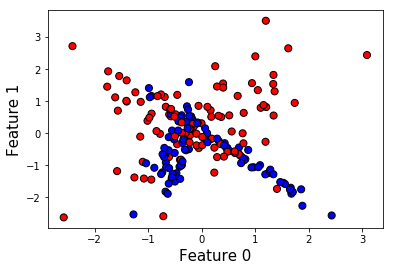

In [124]:
# Getting Data Ready
student_identity = 'alitamu3'

filenameToRead = '5challenge_training_' + student_identity + '.csv'
training_df = pd.read_csv('../../../Challenges/5Files/' + filenameToRead)

print(training_df.head())

X1 = training_df[['Feature 0', 'Feature 1']].values
Y1 = training_df[['Class']].values

color = ['blue' if l == 0 else 'red' for l in Y1]
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=color,
            s=50, edgecolor='k')
plt.xlabel('Feature 0', fontsize=15)
plt.ylabel('Feature 1', fontsize=15)
plt.show()

In [125]:
#Splitting Data for training and validation
X = X1
y = Y1.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [130]:
#Using Grid search CV to idetify the best kernel among linear, polynomial, rbf and sigmoid
pipe = Pipeline([
    ('clf', SVC())
])

param_grid = [
    {
        'clf__degree' : [2,3,4],
        'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'clf__C': [1,5,10,20]
    }]

In [131]:
grid = GridSearchCV(pipe, cv=3, n_jobs=1, param_grid=param_grid, verbose=5, scoring='accuracy')

In [132]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] clf__C=1, clf__degree=2, clf__kernel=linear .....................
[CV]  clf__C=1, clf__degree=2, clf__kernel=linear, score=0.6111111111111112, total=   0.0s
[CV] clf__C=1, clf__degree=2, clf__kernel=linear .....................
[CV]  clf__C=1, clf__degree=2, clf__kernel=linear, score=0.6981132075471698, total=   0.0s
[CV] clf__C=1, clf__degree=2, clf__kernel=linear .....................
[CV]  clf__C=1, clf__degree=2, clf__kernel=linear, score=0.660377358490566, total=   0.0s
[CV] clf__C=1, clf__degree=2, clf__kernel=poly .......................
[CV]  clf__C=1, clf__degree=2, clf__kernel=poly, score=0.5555555555555556, total=   0.0s
[CV] clf__C=1, clf__degree=2, clf__kernel=poly .......................
[CV]  clf__C=1, clf__degree=2, clf__kernel=poly, score=0.5849056603773585, total=   0.0s
[CV] clf__C=1, clf__degree=2, clf__kernel=poly .......................
[CV]  clf__C=1, clf__degree=2, clf__kernel=poly, score=0.62264

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV]  clf__C=1, clf__degree=4, clf__kernel=poly, score=0.6037735849056604, total=   0.0s
[CV] clf__C=1, clf__degree=4, clf__kernel=poly .......................
[CV]  clf__C=1, clf__degree=4, clf__kernel=poly, score=0.5849056603773585, total=   0.0s
[CV] clf__C=1, clf__degree=4, clf__kernel=rbf ........................
[CV]  clf__C=1, clf__degree=4, clf__kernel=rbf, score=0.6481481481481481, total=   0.0s
[CV] clf__C=1, clf__degree=4, clf__kernel=rbf ........................
[CV]  clf__C=1, clf__degree=4, clf__kernel=rbf, score=0.7547169811320755, total=   0.0s
[CV] clf__C=1, clf__degree=4, clf__kernel=rbf ........................
[CV]  clf__C=1, clf__degree=4, clf__kernel=rbf, score=0.660377358490566, total=   0.0s
[CV] clf__C=1, clf__degree=4, clf__kernel=sigmoid ....................
[CV]  clf__C=1, clf__degree=4, clf__kernel=sigmoid, score=0.6111111111111112, total=   0.0s
[CV] clf__C=1, clf__degree=4, clf__kernel=sigmoid ....................
[CV]  clf__C=1, clf__degree=4, clf__kerne

[CV]  clf__C=10, clf__degree=3, clf__kernel=sigmoid, score=0.37735849056603776, total=   0.0s
[CV] clf__C=10, clf__degree=4, clf__kernel=linear ....................
[CV]  clf__C=10, clf__degree=4, clf__kernel=linear, score=0.6111111111111112, total=   0.0s
[CV] clf__C=10, clf__degree=4, clf__kernel=linear ....................
[CV]  clf__C=10, clf__degree=4, clf__kernel=linear, score=0.6981132075471698, total=   0.0s
[CV] clf__C=10, clf__degree=4, clf__kernel=linear ....................
[CV]  clf__C=10, clf__degree=4, clf__kernel=linear, score=0.660377358490566, total=   0.0s
[CV] clf__C=10, clf__degree=4, clf__kernel=poly ......................
[CV]  clf__C=10, clf__degree=4, clf__kernel=poly, score=0.5925925925925926, total=   0.0s
[CV] clf__C=10, clf__degree=4, clf__kernel=poly ......................
[CV]  clf__C=10, clf__degree=4, clf__kernel=poly, score=0.6037735849056604, total=   0.0s
[CV] clf__C=10, clf__degree=4, clf__kernel=poly ......................
[CV]  clf__C=10, clf__deg

[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:    0.8s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'clf__degree': [2, 3, 4], 'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'clf__C': [1, 5, 10, 20]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=5)

In [133]:
#Chosing the Best Parameters from Grid Search CV
grid.best_params_

{'clf__C': 5, 'clf__degree': 2, 'clf__kernel': 'rbf'}

In [134]:
# Forming SVC using best parameters
clf = SVC(kernel='rbf', C=5)  
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test) 
print(accuracy_score(y_test, y_pred))

0.725


Text(0.5,1,'SVM Decision Region Boundary')

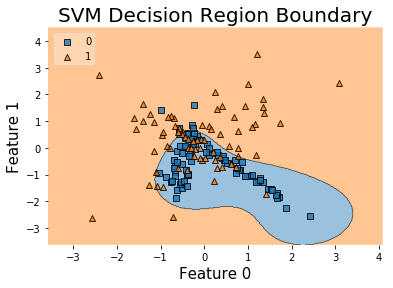

In [138]:
#Plotting the decision boundary
plot_decision_regions(X=X_train, 
                      y=y_train,
                      clf=clf, 
                      legend=2)
plt.xlabel('Feature 0', size=15)
plt.ylabel('Feature 1', size=15)
plt.title('SVM Decision Region Boundary', size=20)

In [189]:
df_test = pd.read_csv('../../../Challenges/5Files/5challenge_testing_alitamu3.csv')
df_test.head(5)

,Unnamed: 0,Class,Feature 0,Feature 1
0,0,NaN,-0.802199,-0.621462
1,1,NaN,0.266443,-1.043482
2,2,NaN,-0.327286,-1.516561
3,3,NaN,0.058759,1.184823
4,4,NaN,-0.411766,0.451022


In [190]:
# get test features
X_test = df_test[['Feature 0', 'Feature 1']].values

In [191]:
clf = SVC(kernel='rbf', C=5)  
clf.fit(X, y) 
y_pred = clf.predict(X_test)

In [192]:
df_test['Class'] = y_pred

In [193]:
df_test = df_test.drop(['Unnamed: 0'], axis=1)

In [194]:
df_test.head(5)

,Class,Feature 0,Feature 1
0,0,-0.802199,-0.621462
1,0,0.266443,-1.043482
2,0,-0.327286,-1.516561
3,1,0.058759,1.184823
4,0,-0.411766,0.451022


In [195]:
df_test.to_csv('5challenge_testing_alitamu3.csv')

Text(0.5,1,'SVM Decision Region Boundary for RBF kernel')

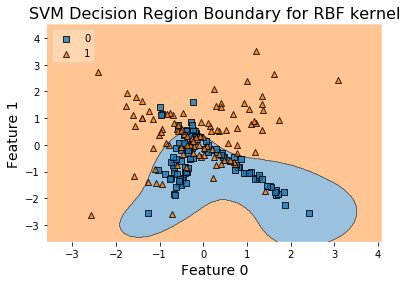

In [197]:
# plot SVC boundaries for the complete training data
plot_decision_regions(X=X, 
                      y=y,
                      clf=clf, 
                      legend=2)
plt.xlabel('Feature 0', size=14)
plt.ylabel('Feature 1', size=14)
plt.title('SVM Decision Region Boundary for RBF kernel', size=16)